In [1]:
#daubechie 2

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pylab as pl
from IPython import display
import pywt
import scipy
from scipy import integrate
import scipy.integrate
from sympy import *

$$
\sigma^2_{\Omega} = \int_{-\infty}^{\infty} |\frac{dx(t)}{dt}|^2 dt \\
\sigma^2_{t}= \int_{-\infty}^{\infty} |t^2x^2(t)| dt
$$
Taking Dual of this, we get:
$$
\sigma^2_{t} = \int_{-\infty}^{\infty} |\frac{d\hat{x}(\Omega)}{d\Omega}|^2 d\Omega \\
\sigma^2_{\Omega}= \int_{-\infty}^{\infty} |\Omega^2\hat{x}^2(\Omega)| d\Omega
$$
$$
\hat{\Phi}(\Omega) = \hat{\Phi}(0) \prod_{l=1}^{\infty} \frac{1}{2} H_0\left(e^{\frac{j\Omega}{2^l}}\right)\\
\hat{\Phi}(\Omega) = \hat{\Phi}(0) \prod_{l=1}^{\infty} \frac{1}{2} \left(1+e^{\frac{-j\Omega}{2^l}}\right)\\
\hat{\Phi}(\Omega) = \hat{\Phi}(0) \prod_{l=1}^{\infty} \frac{1}{2} \left(1+cos(\frac{\Omega}{2^l})-jsin(\frac{\Omega}{2^l})\right)\\
\hat{\Phi}(\Omega) = \hat{\Phi}(0) \prod_{l=1}^{\infty} \frac{1}{2}. 2cos(\frac{\Omega}{2^{l+1}}) \left(cos(\frac{\Omega}{2^{l+1}})-jsin(\frac{\Omega}{2^{l+1}})\right)\\
$$
$$
\hat{\Phi}(\Omega) = \hat{\Phi}(0) \prod_{l=1}^{\infty} cos(\frac{\Omega}{2^{l+1}}) \left(cos(\frac{\Omega}{2^{l+1}})-jsin(\frac{\Omega}{2^{l+1}})\right)\\
$$
Since,
$$
\left|cos(\frac{\Omega}{2^{l+1}})-jsin(\frac{\Omega}{2^{l+1}})\right|=1\\
|\hat{\Phi}(\Omega)|= |\hat{\Phi}(0)|. \prod_{l=1}^{\infty} cos(\frac{\Omega}{2^{l+1}})\\
\prod_{l=1}^{\infty} cos(\frac{\Omega}{2^{l+1}})= cos(\frac{\Omega}{2^{2}}). cos(\frac{\Omega}{2^{3}})....cos(\frac{\Omega}{2^{l+1}})\\
\prod_{l=1}^{\infty} cos(\frac{\Omega}{2^{l+1}})= cos(\frac{\Omega}{2^{2}}). cos(\frac{\Omega}{2^{3}})....cos(\frac{\Omega}{2^{l+1}}).\frac{sin(\frac{\Omega}{2^{l+1}})}{sin(\frac{\Omega}{2^{l+1}})}\\
\prod_{l=1}^{\infty} cos(\frac{\Omega}{2^{l+1}})= \frac{sin(\frac{\Omega}{2})}{2^{l}sin(\frac{\Omega}{2^{l+1}})}
$$
Thus,
$$
|\hat{\Phi}(\Omega)|= |\hat{\Phi}(0)|. \frac{sin(\frac{\Omega}{2})}{2^{l}sin(\frac{\Omega}{2^{l+1}})} \\
$$

# Question 1

In [15]:
def convo(x,y,n):
    for i in range(n):
        x=np.repeat(x,2)
        x[1::2]=0
        x=np.convolve(x,y,mode="full")
    return x

In [71]:
def fil_of_size(n):
    a= 'db'+str(n)
    wavelet=pywt.Wavelet(a)
    b=wavelet.filter_bank[0]
    h=np.zeros(2*n)
    h_a=np.zeros(2*n)
    h_high=np.zeros(2*n)
    for i in range(2*n):
        h[i]=b[2*n-1-i]
        h_a[i]=b[2*n-1-i]
        h_high[i]=b[i]
    ans=convo(h,h_a,10)
    h_high[1::2]=-h_high[1::2]
    k=ans.shape[0]
    t1=np.arange(0.0,1.0,1/k)*k/(2**11)
    ans2=convo(h_high,h_a,10)
    k2=ans2.shape[0]
    t2=np.arange(0.0,1.0,1/k2)*k2/(2**11)
    return (t1,t2,ans,ans2)

In [72]:
t1,t2,haar_low,haar_high=fil_of_size(1)

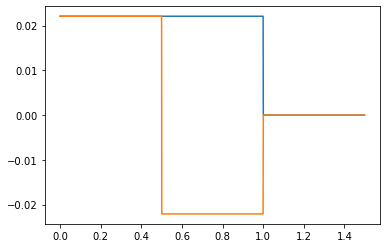

In [73]:
plt.plot(t1,haar_low)
plt.plot(t2,haar_high)

In [74]:
daub9=pywt.Wavelet('db30').filter_bank[0]
daub_9=pywt.Wavelet('db30').filter_bank[1]

In [75]:
from scipy.signal import freqz

In [76]:
d9=freqz(daub9)
d_9=freqz(daub_9)

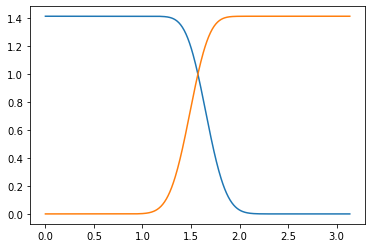

In [77]:
plt.plot(d9[0],np.abs(d9[1]))
plt.plot(d_9[0],np.abs(d_9[1]))

In [100]:
def scal_wav_filter_ft(n):
    t,th,low,high=fil_of_size(int(n/2))
    t1=np.zeros(len(low))
    th1=np.zeros(len(high))
    for i in range(len(t1)):
        t1[i]=t[i]
    for i in range(len(th1)):
        th1[i]=th[i]
    a='db'+str(int(n/2))
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.plot(t1,low,label='Scaling length '+str(n))
    plt.plot(th1,high,label='Wavelet length '+str(n))
    plt.title("Wavelet and Scaling functions length "+str(n))
    plt.legend()
    fil=pywt.Wavelet(a).filter_bank[0]
    fil_1=pywt.Wavelet(a).filter_bank[1]
    filx=freqz(fil)
    fil_x=freqz(fil_1)
    plt.subplot(1,2,2)
    plt.plot(filx[0],np.abs(filx[1]),label='Scaling LPF length '+str(n))
    plt.plot(fil_x[0],np.abs(fil_x[1]),label='Wavelet HPF length '+str(n))
    plt.title("Fourier Transform of Wavelet and Scaling functions length " + str(n))
    plt.legend()
    plt.show()

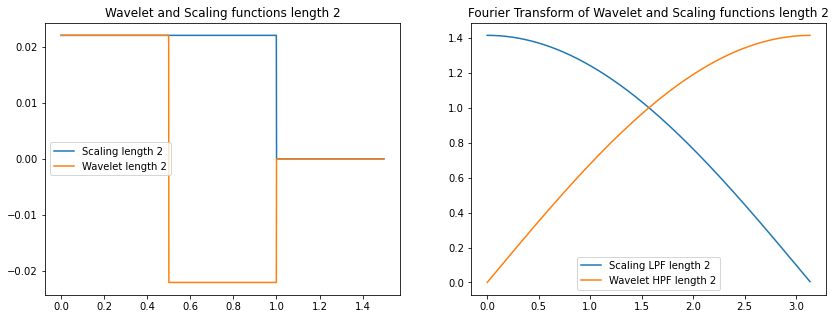

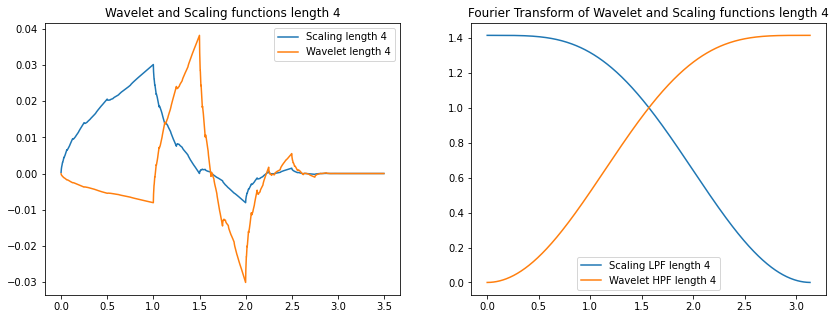

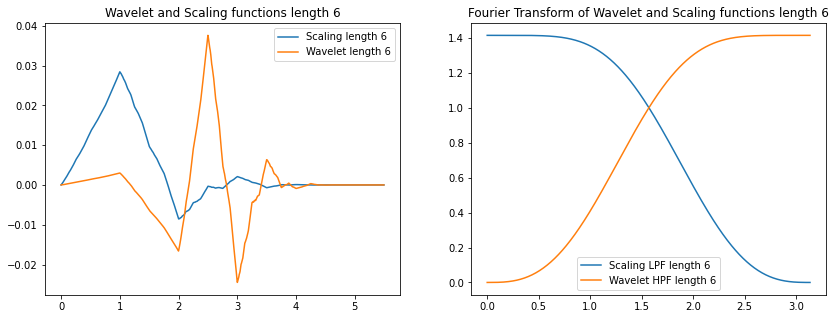

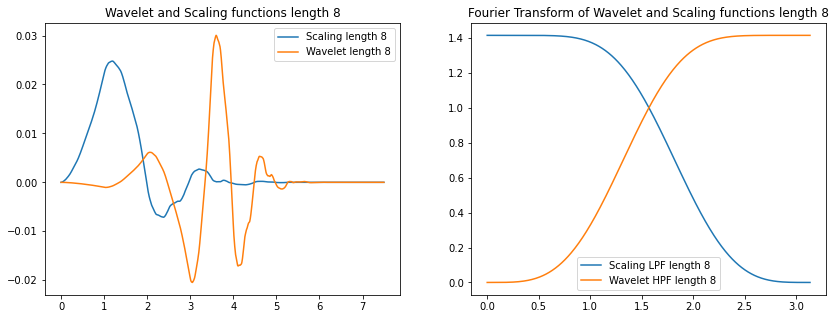

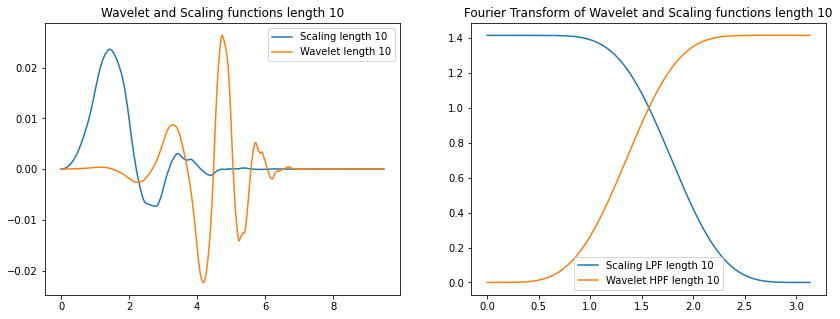

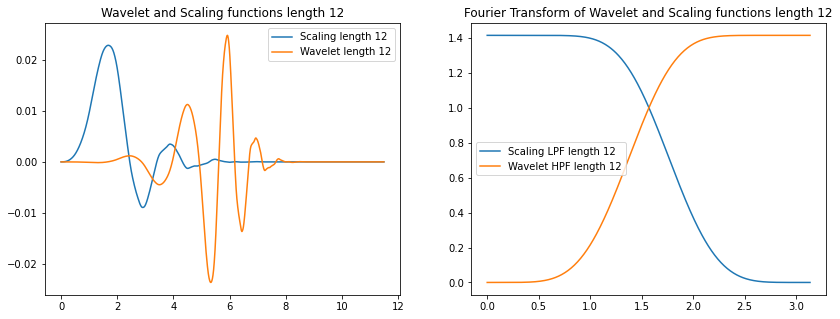

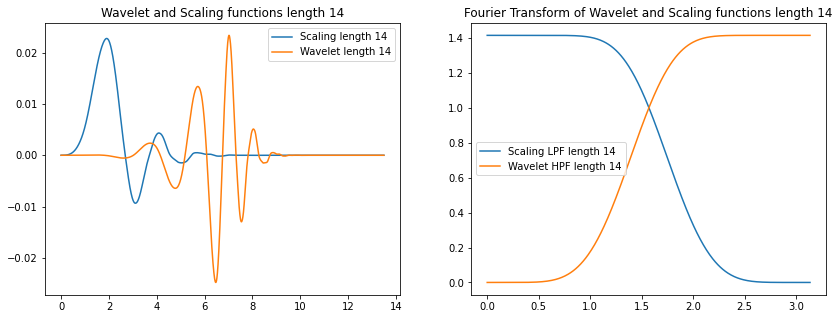

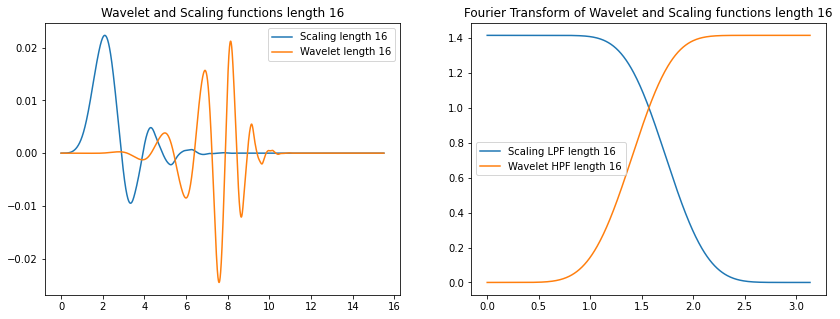

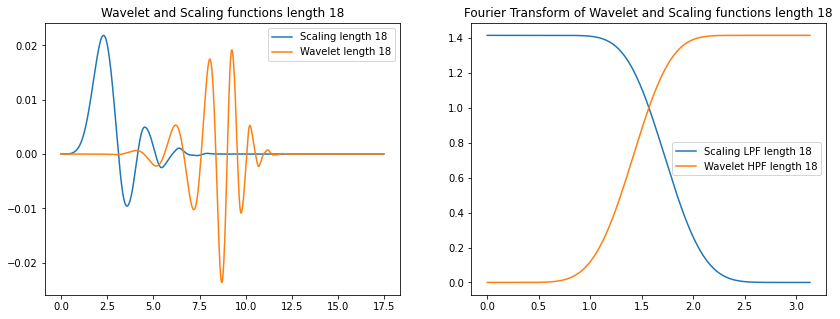

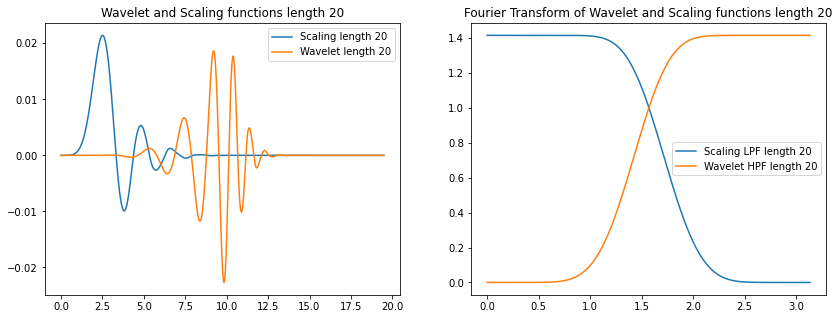

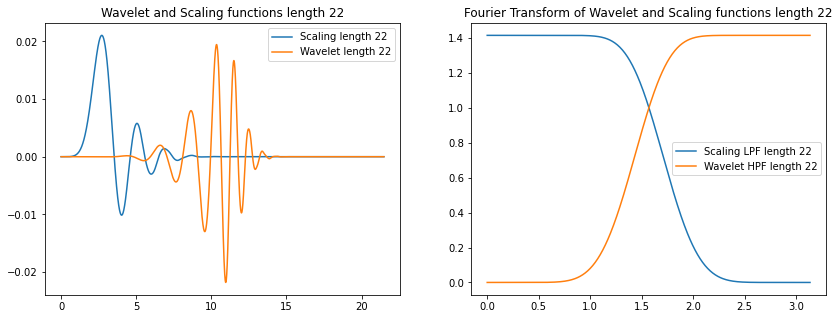

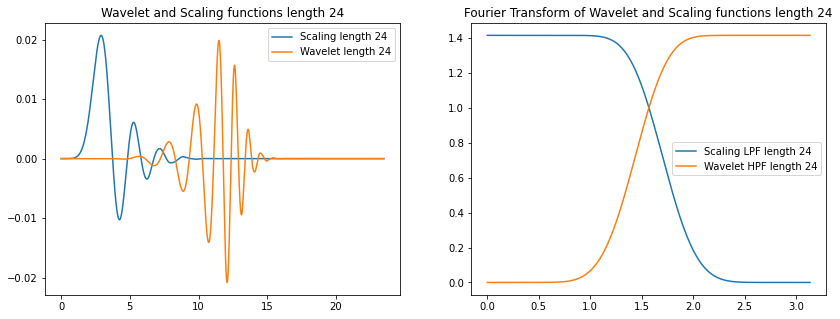

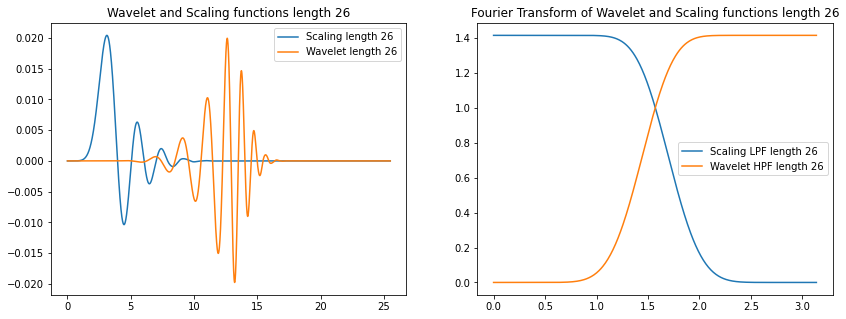

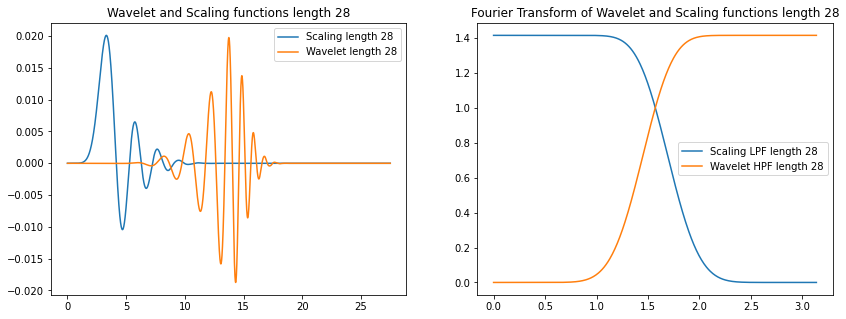

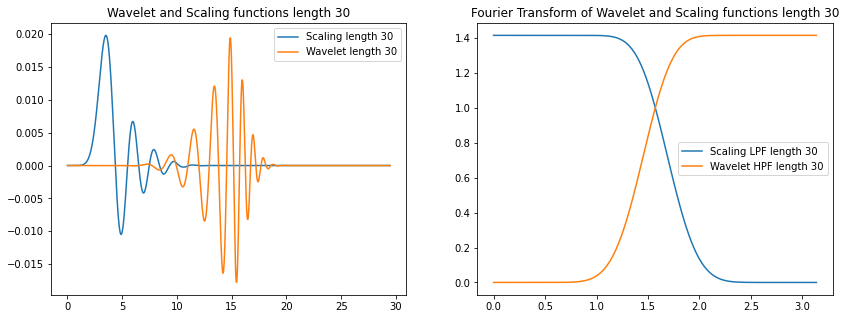

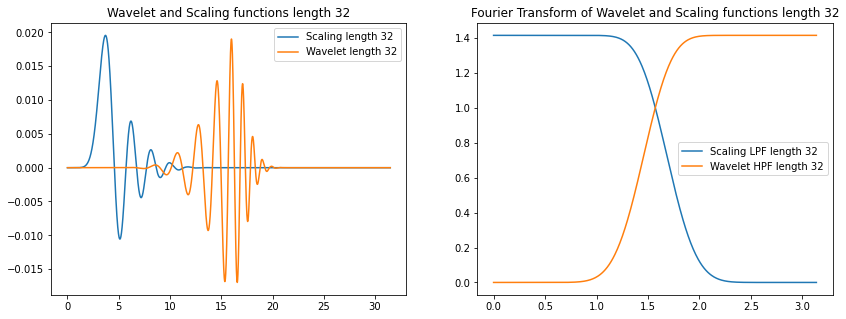

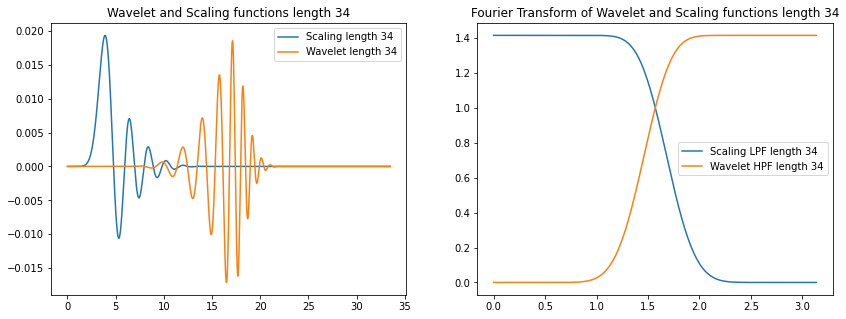

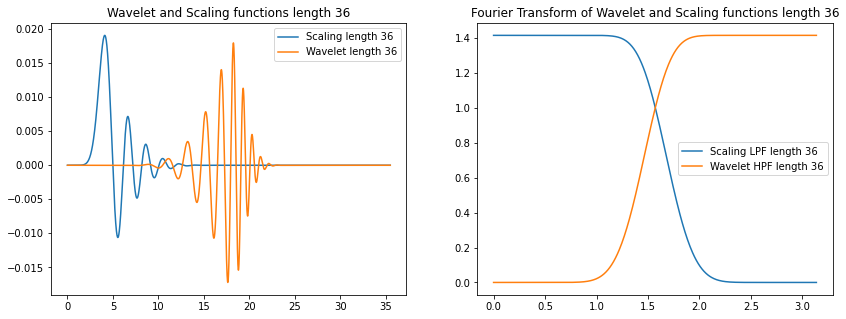

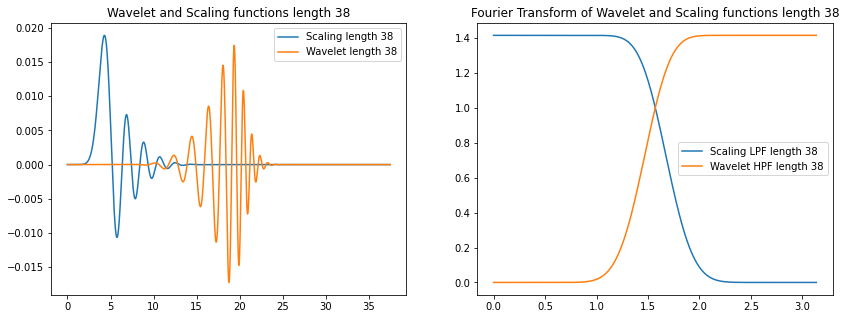

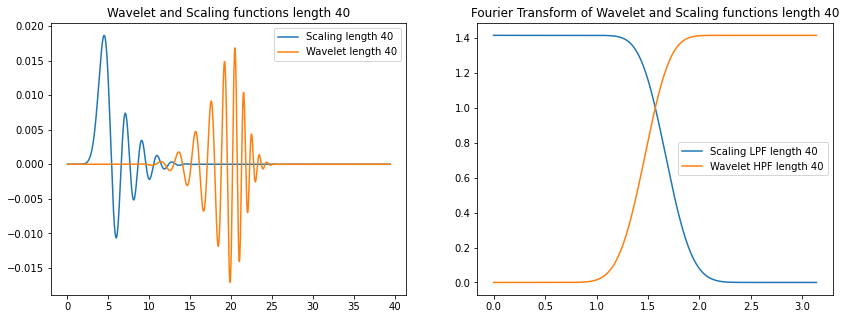

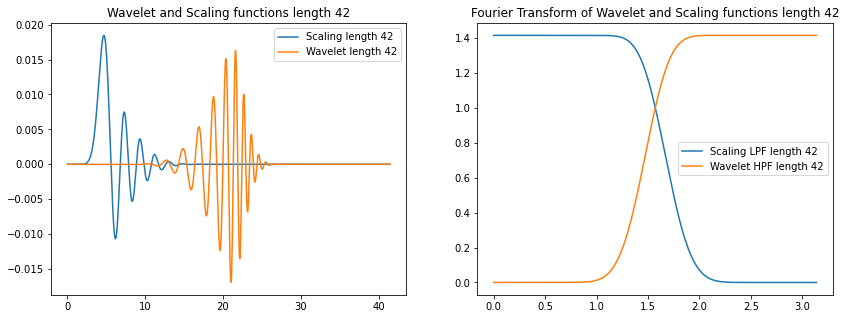

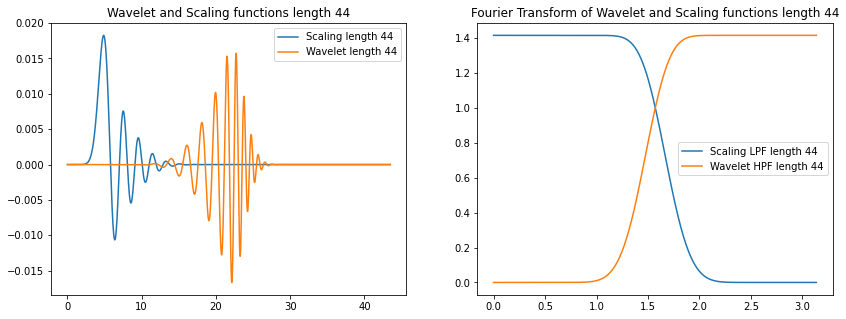

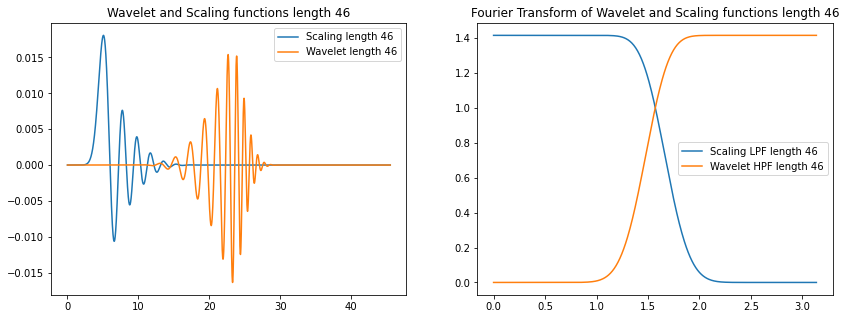

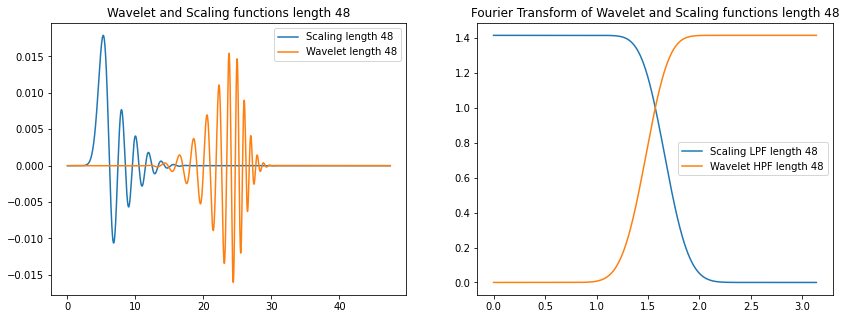

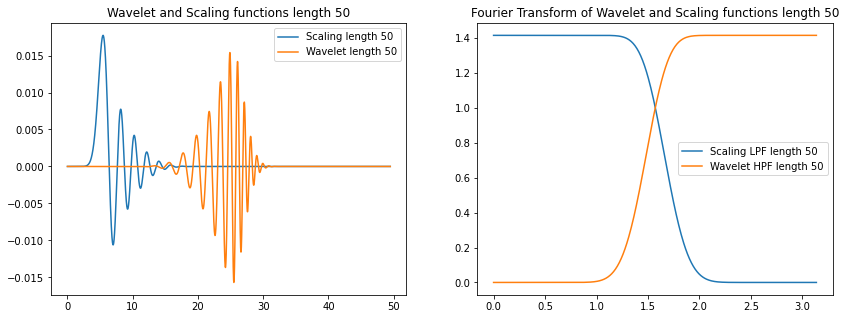

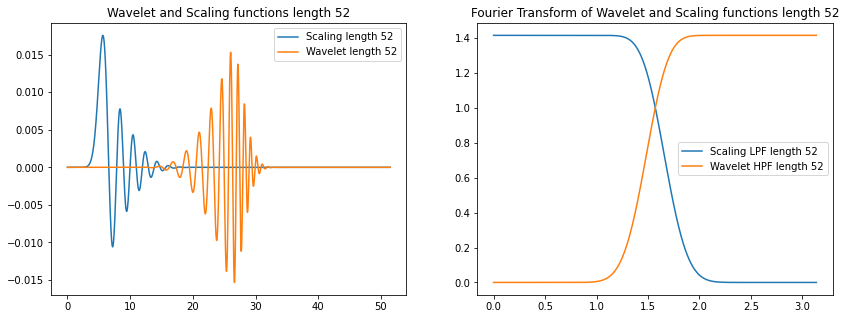

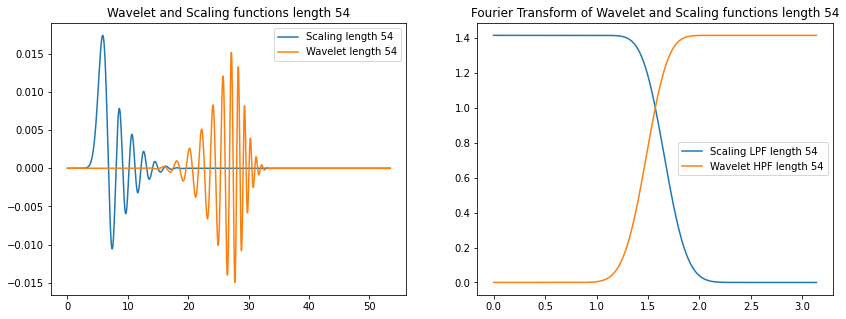

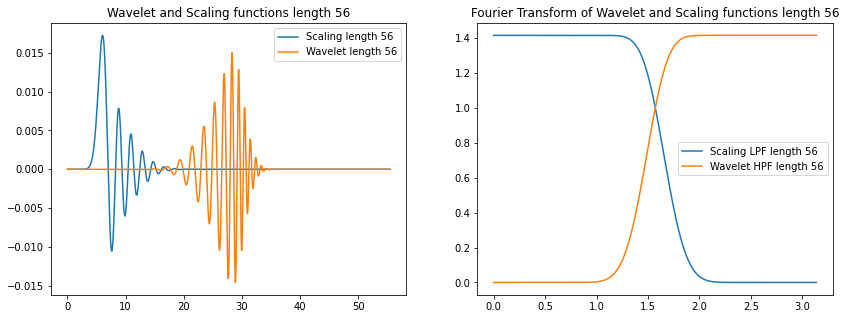

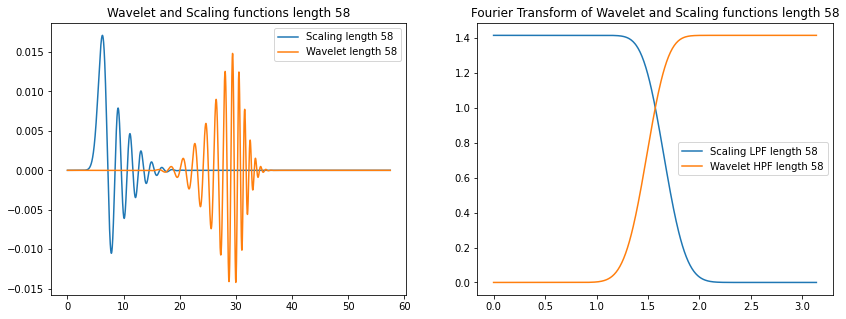

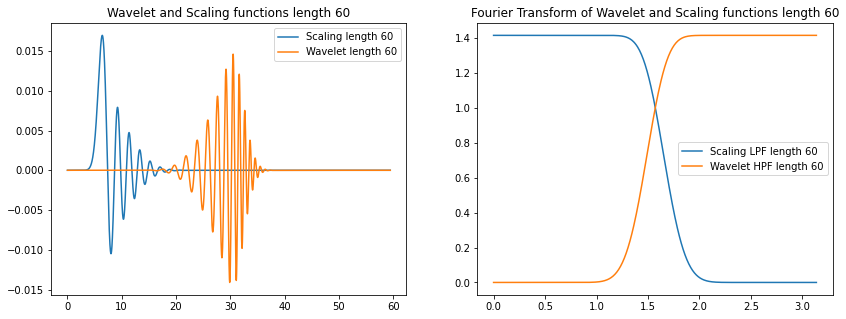

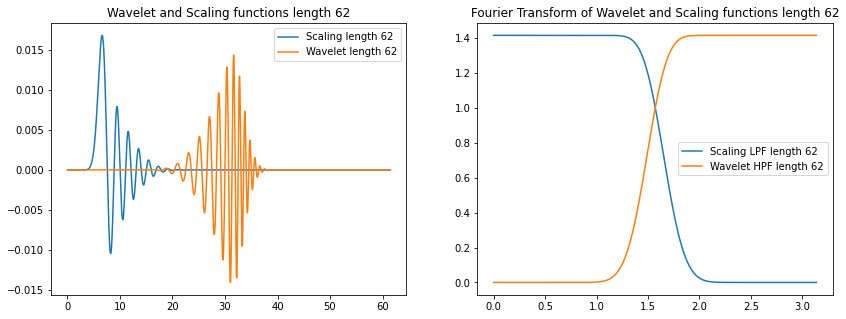

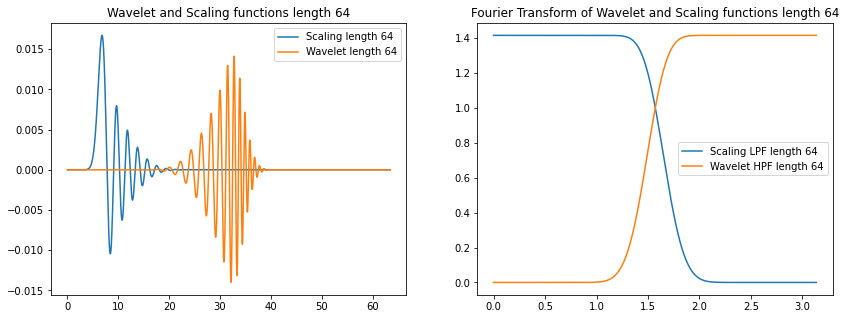

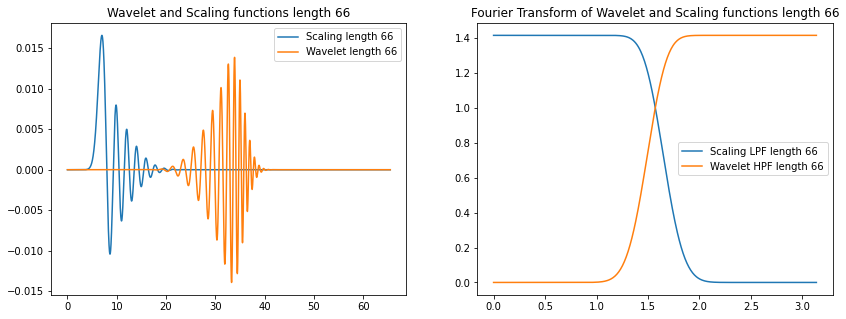

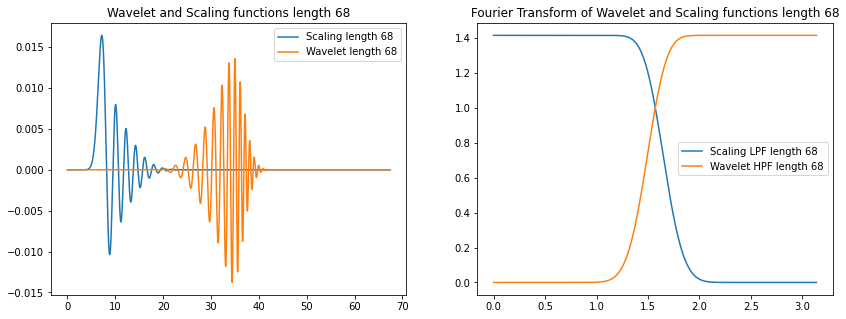

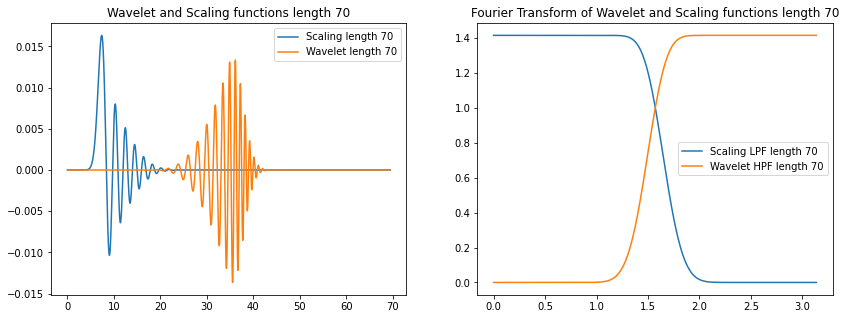

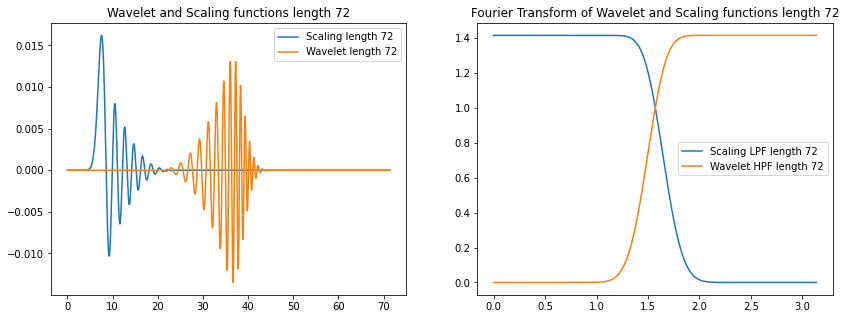

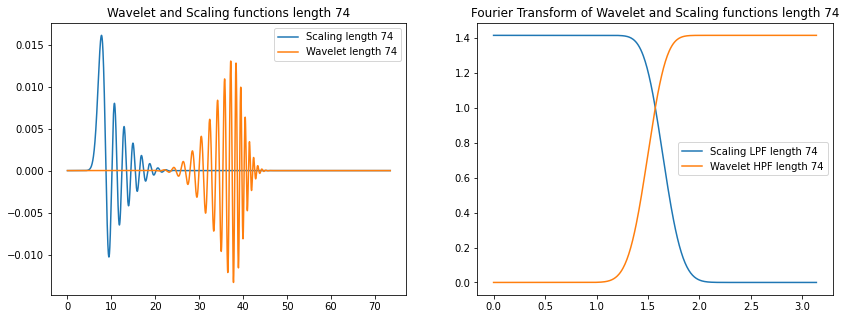

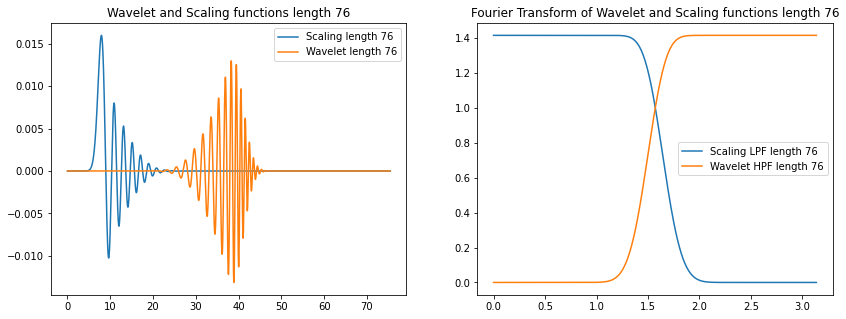

In [101]:
for i in range(1,39):
    scal_wav_filter_ft(2*i)

# Question 2

### Defining functions for norm, time center and nth time moment

In [102]:
def norm(d):
    a=np.multiply(d,d)
    return scipy.integrate.simps(a)

In [103]:
def tim_center(t,d):
    a=np.multiply(t,d)
    a1=np.multiply(a,d)
    return scipy.integrate.simps(a1)/norm(d)

In [104]:
def moment(n,t,d):
    a=np.multiply(d,d)
    x=t-tim_center(t,d)
    k=t-tim_center(t,d)
    for i in range(n-1):
        x=np.multiply(x,k)
    a1=np.multiply(x,a)
    return scipy.integrate.simps(a1)/norm(d)

### Printing first 10 time moments for filter of length n

In [131]:
def time_moments(n):
    t,th,low,high=fil_of_size(int(n/2))
    t1=np.zeros(len(low))
    th1=np.zeros(len(high))
    for i in range(len(t1)):
        t1[i]=t[i]
    for i in range(len(th1)):
        th1[i]=th[i]
    t0_scal=tim_center(t1,low)
    t0_wav=tim_center(th1,high)
    scal=[t0_scal]
    wav=[t0_wav]
    length=10
    for i in range(2,length):
        scal.append(moment(i,t1,low))
        wav.append(moment(i,th1,high))
    print(scal,wav)
    plt.figure()
    plt.plot([i+1 for i in range(length-1)],scal,label='Scaling length '+str(n))
    plt.plot([i+1 for i in range(length-1)],wav,label='Wavelet length '+str(n))
    plt.title("Time moments for Scaling and Wavelet filters of length "+str(n))
    plt.legend()
    plt.show()

[1.2659174340585666, 0.17291953136146826, 0.0969980620479838, 0.21068953158226977, 0.3096494664180119, 0.6266909393896242, 1.2911327279944402, 3.0032221085377424, 7.4731392253128766] [3.49950908506776, 0.25049079132123553, -0.09053766327890356, 0.28763292951367636, -0.31735829973152535, 0.7434072760324026, -1.3125903642164258, 3.088793152734612, -6.895836827374752]


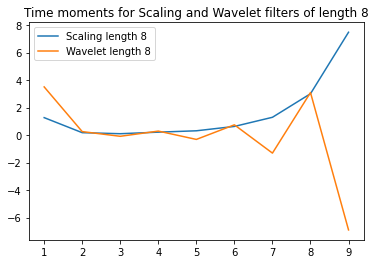

In [136]:
time_moments(8)

### Function to return value of 1 to mth moment of nth daubeshie filter

In [138]:
def time_moments_values(nth_daub,mth_moment):
    n=nth_daub
    length=mth_moment
    t,th,low,high=fil_of_size(int(n/2))
    t1=np.zeros(len(low))
    th1=np.zeros(len(high))
    for i in range(len(t1)):
        t1[i]=t[i]
    for i in range(len(th1)):
        th1[i]=th[i]
    t0_scal=tim_center(t1,low)
    t0_wav=tim_center(th1,high)
    scal=[t0_scal]
    wav=[t0_wav]
    for i in range(2,length):
        scal.append(moment(i,t1,low))
        wav.append(moment(i,th1,high))
    return (scal,wav)

In [171]:
#noting all moments for all 38 filters
scaling_all=[]
wavelets_all=[]
for i in range(38):
    m=2*i+2
    scal1,wav1=time_moments_values(m,30)
    scaling_all.append(scal1)
    wavelets_all.append(wav1)

### Variation of nth moment wrt filter length

In [172]:
def nth_moment_vs_filter_length(n):
    moments_scal=[scaling_all[i][n-1] for i in range(38)]
    moments_wav=[wavelets_all[i][n-1] for i in range(38)]
    plt.figure()
    plt.plot([2*i for i in range(38)],moments_scal,label="Scaling function")
    plt.plot([2*i for i in range(38)],moments_wav,label="Wavelet function")
    plt.title(str(n)+"th moment for Scaling and Wavelet functions for lengths 2 to 76")
    plt.legend()
    plt.show()

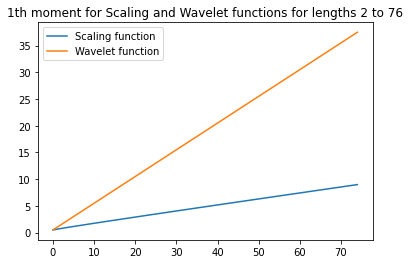

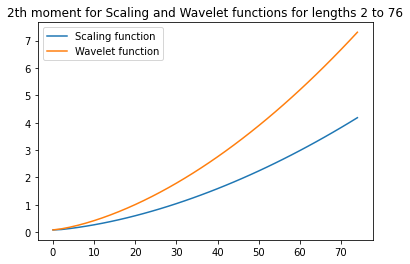

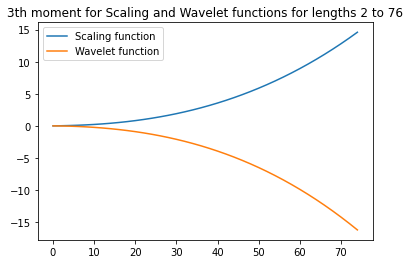

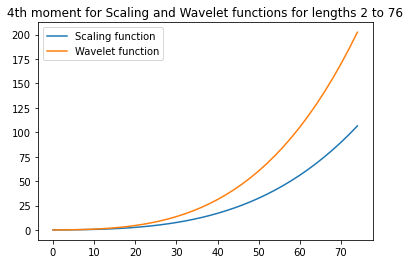

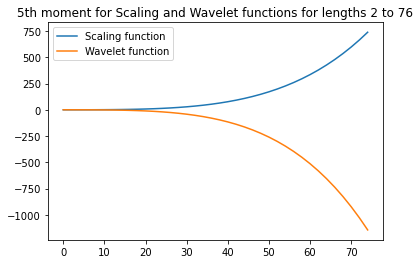

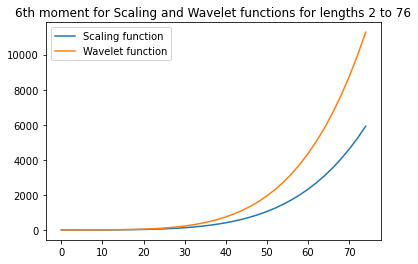

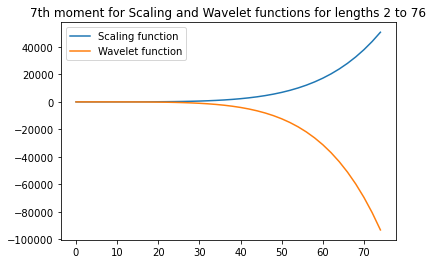

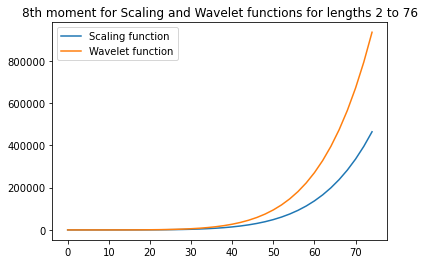

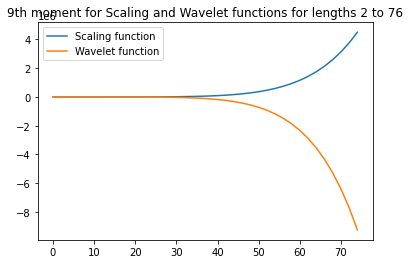

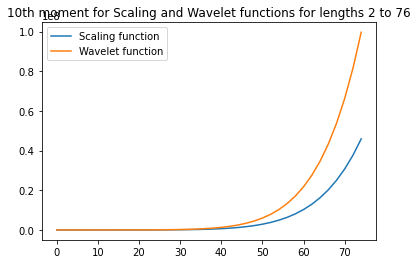

In [173]:
for i in range(10):
    nth_moment_vs_filter_length(i+1)

### Nth moment of filter of length L

In [186]:
def nth_moment_vs_n(l):
    moments_scal=[scaling_all[l][i] for i in range(10)]
    moments_wav=[wavelets_all[l][i] for i in range(10)]
    plt.figure()
    plt.plot([i for i in range(10)],moments_scal,label="Scaling function length "+str(2*l+2))
    plt.plot([i for i in range(10)],moments_wav,label="Wavelet function length"+str(2*l+2))
    plt.title("The values of first 10 moments for daubeshie filter length "+str(2*l+2))
    plt.legend()
    plt.show()

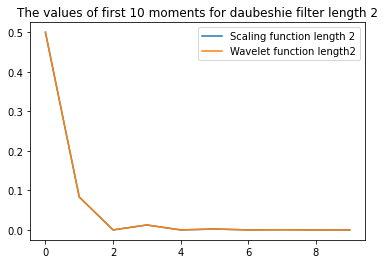

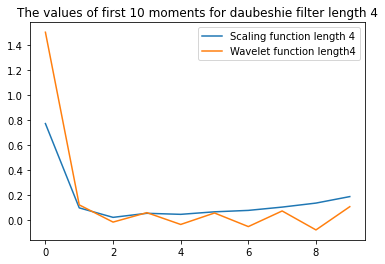

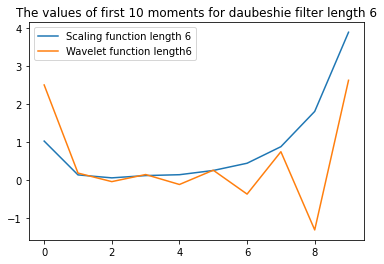

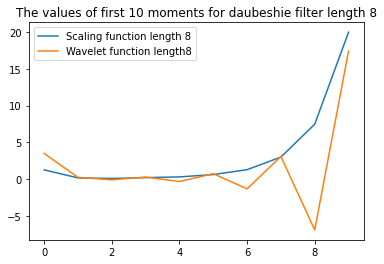

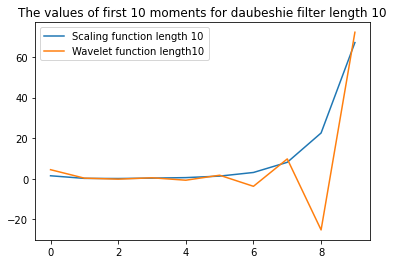

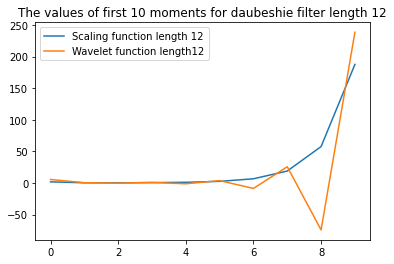

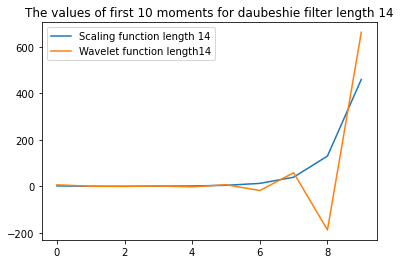

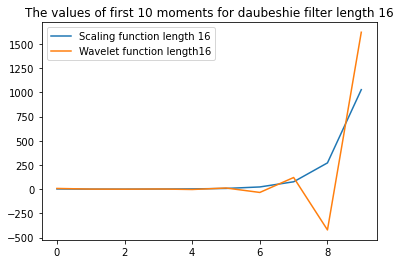

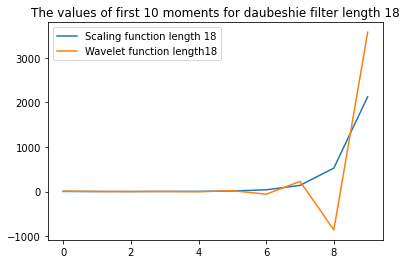

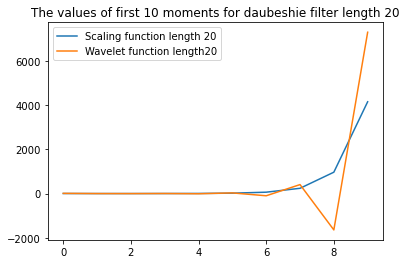

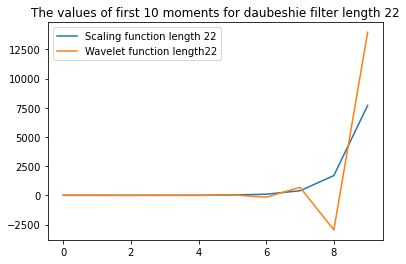

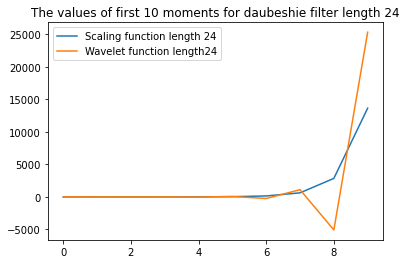

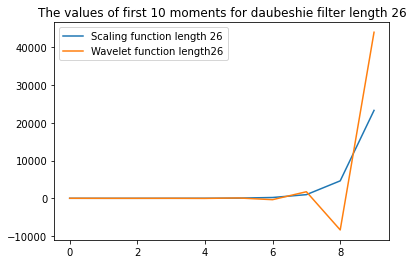

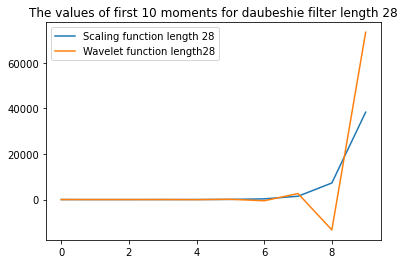

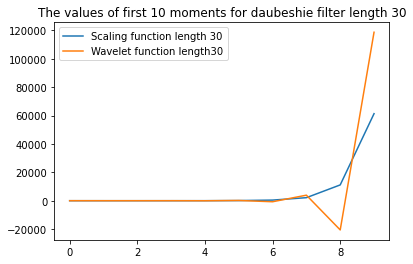

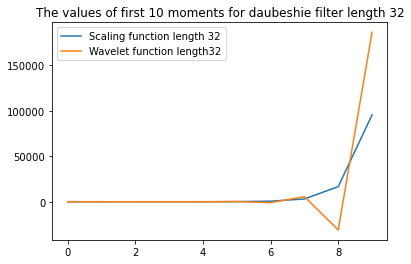

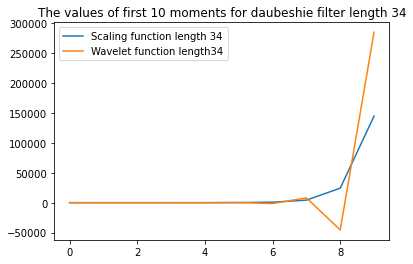

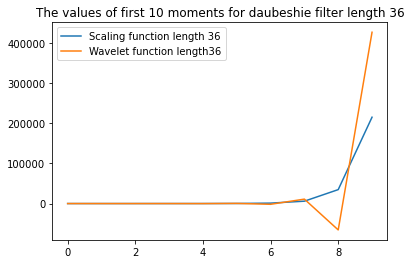

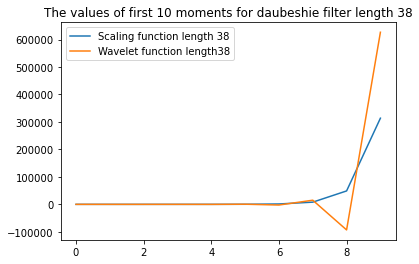

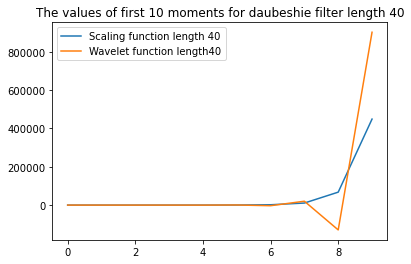

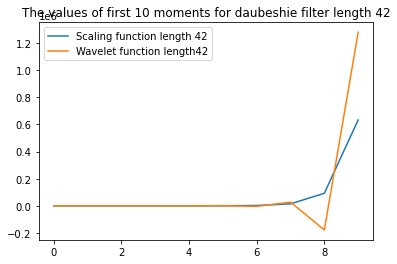

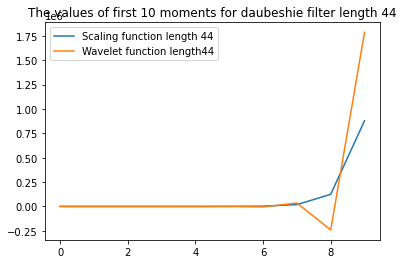

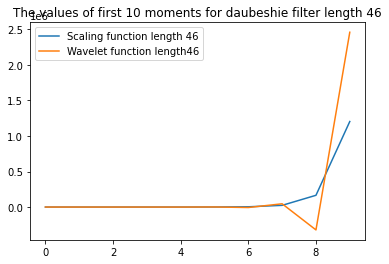

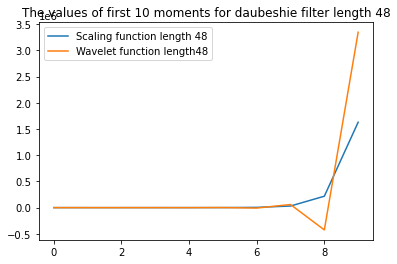

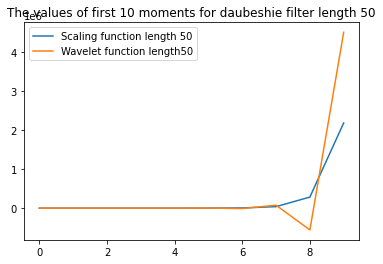

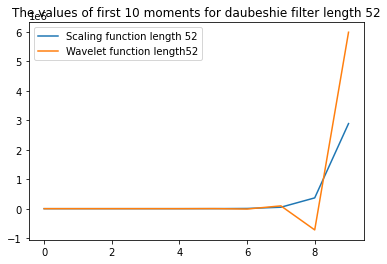

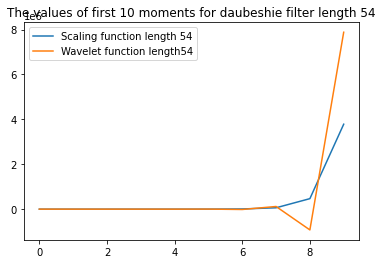

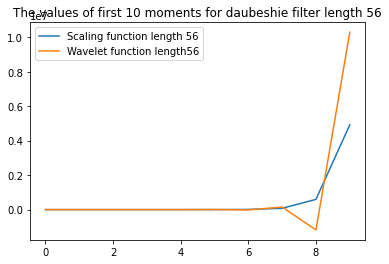

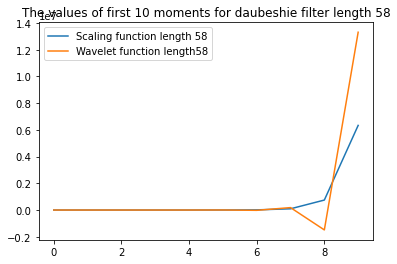

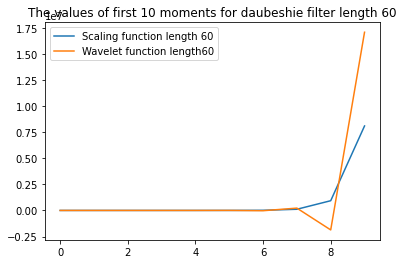

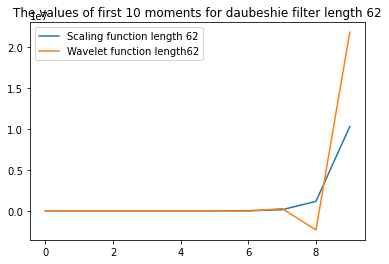

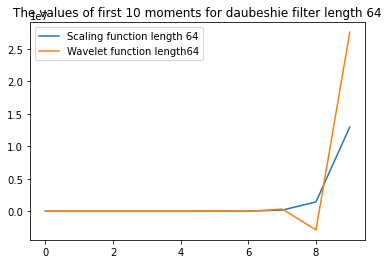

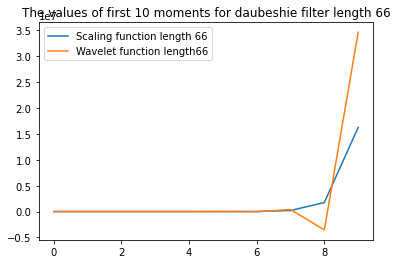

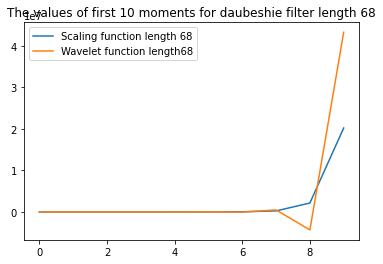

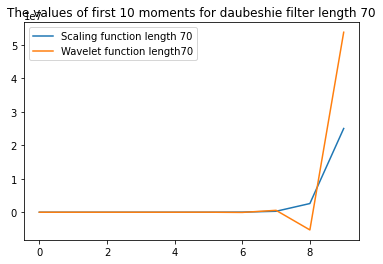

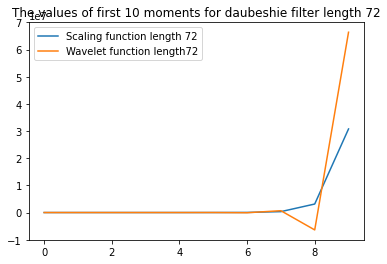

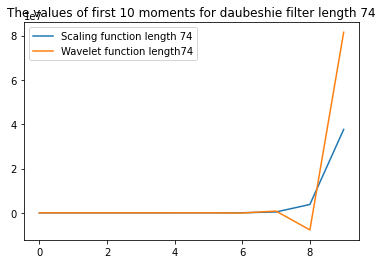

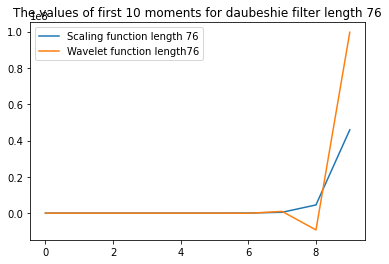

In [187]:
for i in range(38):
    nth_moment_vs_n(i)

In [126]:
for i in range(2,11):
    print(i,moment(i,t1_40,daub40_low))

2 1.4731361765866156
3 3.177556882482523
4 14.691389356928758
5 64.22321027146288
6 329.74610938460904
7 1813.4490901068525
8 10753.875291229358
9 67666.85418940085
10 449054.475857834


In [11]:
t2,daub2=t0(2)
t3,daub3=t0(3)
t4,daubx=t0(4)
t5,daub5=t0(5)
t6,daub6=t0(6)
t7,daub7=t0(7)
t8,daub8=t0(8)
t9,daub9=t0(9)


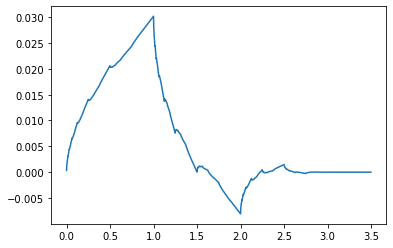

In [41]:
plt.plot(t2,daub2)

In [42]:
#integral |x(t)|^2
def norm(d):
    a=np.multiply(d,d)
    return scipy.integrate.simps(a)

In [43]:
norm(daub5)

0.999999999999943

In [ ]:
vari=symbola('vari')
def gen(t,d):
    a=np.multiply(vari,d)
    b=np.exp(a)
    b1=np.multiply(b,d)
    b2=np.multiply(b1,d)
    return integrate(b2)

In [44]:
def tim_center(t,d):
    a=np.multiply(t,d)
    a1=np.multiply(a,d)
    return scipy.integrate.simps(a1)/norm(d)

In [45]:
print(tim_center(t1,haar))

0.49991860654403397


In [46]:
def moment(n,t,d):
    a=np.multiply(d,d)
    x=t-tim_center(t,d)
    k=t-tim_center(t,d)
    for i in range(n-1):
        x=np.multiply(x,k)
    a1=np.multiply(x,a)
    return scipy.integrate.simps(a1)/norm(d)

In [47]:
moment(2,t1,haar)

0.08330619555644997

In [48]:
for i in range(2,11):
    print(i,moment(i,t1,haar))

2 0.08330619555644997
3 -6.625973141477782e-09
4 0.012491857340885058
5 -3.313346190609807e-09
6 0.0022299614323193473
7 -1.2426397211126013e-09
8 0.000433462130990863
9 -4.142582200274537e-10
10 8.863375990279771e-05


In [49]:
for i in range(2,11):
    print(i,moment(i,t2,daub2))

2 0.09771815249452524
3 0.022098571050712914
4 0.054454407883204194
5 0.046153084301657765
6 0.06632321424683915
7 0.07766601576459627
8 0.10397627360873968
9 0.1360056742849123
10 0.1878258640465801


In [50]:
for i in range(2,11):
    print(i,moment(i,t3,daub3))

2 0.13205592523496848
3 0.053917019356445044
4 0.11400143188770313
5 0.1369244087999293
6 0.24841794321760316
7 0.43889217379547985
8 0.8745690552147191
9 1.803269376634544
10 3.8875336322782283


In [51]:
for i in range(2,11):
    print(i,moment(i,t4,daubx))

2 0.17291953136146826
3 0.0969980620479838
4 0.21068953158226977
5 0.3096494664180119
6 0.6266909393896242
7 1.2911327279944402
8 3.0032221085377424
9 7.4731392253128766
10 19.971637932325432


In [52]:
for i in range(2,11):
    print(i,moment(i,t5,daub5))

2 0.21920095495335445
3 0.1527245516948651
4 0.34959648414813865
5 0.5950843132455411
6 1.3397123199346046
7 3.128903796938989
8 8.132304408552823
9 22.559680201039352
10 67.06609752135194


In [53]:
for i in range(2,11):
    print(i,moment(i,t6,daub6))

2 0.2706887567382035
3 0.2224755859358282
4 0.5397807741809875
5 1.0343701229925266
6 2.5539177993423436
7 6.606816042062822
8 18.88501354115911
9 57.60656842481035
10 187.68042828496712


In [54]:
for i in range(2,11):
    print(i,moment(i,t7,daub7))

2 0.3272519777581441
3 0.3074882778412765
4 0.7913636154303638
5 1.6775841875218613
6 4.495859079830501
7 12.698930241924694
8 39.42602669675094
9 130.53070475220701
10 460.4632138252567


In [55]:
for i in range(2,11):
    print(i,moment(i,t8[1:],daub8))

2 0.38875048217710434
3 0.40882133481052146
4 1.1148699630602552
5 2.582647371897664
6 7.454818713340014
7 22.769145981654713
8 76.13095195419749
9 271.2003009933932
10 1027.1351167892599


In [56]:
for i in range(2,11):
    print(i,moment(i,t9,daub9))

2 0.4550415105125269
3 0.5273857080416021
4 1.5209895617757554
5 3.814475418831775
6 11.785763332920384
7 38.64172668073175
8 138.26354086112784
9 526.6364229387381
10 2128.7786990523473


In [57]:
def n_diff2(x,n,u):
    if n==0:
        return np.multiply(x,x)
    k= int(n-n%1)
    if n%1 !=0:
        return 0
    d=np.zeros(len(x))
    for i in range(len(x)-1):
        d[i]=(x[i+1]-x[i])*len(x)/(2*u)
    for i in range(k-1):
        for j in range(len(d)-1):
            d[j]=(d[j+1]-d[j])*len(d)/(2*u)
    return np.multiply(d,d)

In [58]:
def sig_omg_n(x,n,k):
    a=n_diff2(x,n/2,k)
    if np.sum(a)==0:
        return 0
    return scipy.integrate.simps(a)/norm(x)

In [59]:
t4,daubx=t0(4)

In [60]:
sig_omg_n(daubx,4,4)

848.3336574151732

In [61]:
for i in range(2,11):
    print(i,sig_omg_n(haar,i,1))

2 1535.2500406967285
3 0
4 5429627279.648443
5 0
6 3.413802499272196e+16
7 0
8 3.0183479378004893e+23
9 0
10 2.561954683829568e+30


In [62]:
t2,daub2=t0(2)
for i in range(2,11):
    print(i,sig_omg_n(daub2,i,2))

2 13.995227122957816
3 0
4 9575530.67914855
5 0
6 94980514576858.33
7 0
8 1.0917212802372238e+21
9 0
10 1.0627781568575984e+28


In [63]:
t3,daub3=t0(3)
for i in range(2,11):
    print(i,sig_omg_n(daub3,i,3))

2 4.413605375670127
3 0
4 46361.82226877175
5 0
6 407629152840.09393
7 0
8 3.7429186770963753e+18
9 0
10 3.342526160627189e+25


In [64]:
t4,daubx=t0(4)
for i in range(2,11):
    print(i,sig_omg_n(daubx,i,4))

2 3.6581112418912807
3 0
4 848.3336574151732
5 0
6 3036024854.6813097
7 0
8 1.9592257594376108e+16
9 0
10 1.8044032137194103e+23


In [65]:
t5,daub5=t0(5)
for i in range(2,11):
    print(i,sig_omg_n(daub5,i,5))

2 3.4578793958155574
3 0
4 71.74228695814153
5 0
6 31705457.963963754
7 0
8 157979854188046.75
9 0
10 1.855525044293723e+21


In [66]:
t6,daub6=t0(6)
for i in range(2,11):
    print(i,sig_omg_n(daub6,i,6))

2 3.3821287673389278
3 0
4 32.46986472673038
5 0
6 502953.84024657955
7 0
8 2381409748516.5605
9 0
10 3.2017687770212344e+19


In [67]:
t7,daub7=t0(7)
for i in range(2,11):
    print(i,sig_omg_n(daub7,i,7))

2 3.3484960549158123
3 0
4 25.528077315172343
5 0
6 16729.990466107083
7 0
8 65029078026.523476
9 0
10 7.00299762862669e+17


In [68]:
t8,daub8=t0(8)
for i in range(2,11):
    print(i,sig_omg_n(daub8,i,8))

2 3.3319053475377896
3 0
4 23.17233835073051
5 0
6 1400.9859031910946
7 0
8 2183460185.69422
9 0
10 1.5869833339068314e+16


In [69]:
t9,daub9=t0(9)
for i in range(2,11):
    print(i,sig_omg_n(daub9,i,9))

2 3.3229289014402545
3 0
4 22.125816947158587
5 0
6 368.9264488238207
7 0
8 73348777.46486403
9 0
10 348180474864688.2


In [70]:
for i  in range(2,10):
    if i==4:
        print("daub4",sig_omg_n(eval("daub"+str("x")),2,4),moment(2,eval("t"+str(i)),eval("daubx")),sig_omg_n(eval("daub"+str("x")),2,4)*moment(2,eval("t"+str(i)),eval("daubx")))
        continue
    if i==8:
        print("daub8",sig_omg_n(eval("daub"+str(i)),2,8),moment(2,eval("t"+str(i)+"[1:]"),eval("daub8")),sig_omg_n(eval("daub"+str(i)),2,8)*moment(2,eval("t"+str(i)+"[1:]"),eval("daub8")))
        continue
    print("daub"+str(i),sig_omg_n(eval("daub"+str(i)),2,i),moment(2,eval("t"+str(i)),eval("daub"+str(i))),sig_omg_n(eval("daub"+str(i)),2,i)*moment(2,eval("t"+str(i)),eval("daub"+str(i))))

daub2 13.995227122957816 0.09771815249452524 1.3675877381967076
daub3 4.413605375670127 0.13205592523496848 0.5828427415061492
daub4 3.6581112418912807 0.17291953136146826 0.6325588816159589
daub5 3.4578793958155574 0.21920095495335445 0.7579704656762986
daub6 3.3821287673389278 0.2706887567382035 0.915504231159487
daub7 3.3484960549158123 0.3272519777581441 1.0958019564865427
daub8 3.3319053475377896 0.38875048217710434 1.2952798104237881
daub9 3.3229289014402545 0.4550415105125269 1.512070586637105


In [71]:
print(sig_omg_n(haar,2,1),moment(2,t1,haar))

1535.2500406967285 0.08330619555644997


In [78]:
for i in range(5):
    print(sig_omg_n(daub2,i,2)*moment(i,t2,daub2), 0.25*sig_omg_n(daubx,2*i,4))

1.006138476144625e-16 0.25
0.0 0.9145278104728202
1.3675877381967076 212.0834143537933
0.0 759006213.6703274
521429.85330049036 4898064398594027.0
